# Exploring the Indian Startup Ecosystem: A Data Driven Analysis of Funding Trends and Industry Sectors

## Business Understanding
### Business Scenario
Your team is trying to venture into the Indian start-up
ecosystem. As the data expert of the team, you are to
investigate the ecosystem and propose the best course
of action.

*Analyze funding received by start-ups in India from
2018 to 2021.*
- Separate data for each year of funding will is
provided.
- In these datasets, you'll find the start-ups' details,
the funding amounts received, and the investors'
information.

### Business Objective
The aim of this project is to perform analysis on the Indian start-ups ecosystem and advice stakeholders on which venture to invest in to increase the potential of high profit/income.

## Hypothesis Testing
*Hypothesis* - The amount of funds a company receive depends on the sector a company finds itself
- Null Hypothesis(H_o) - The funds a company receive does not depend on the sector of investment
- Alternate Hypothesis(H_a) - The funds a company receive depends on the sector of investment

### Business Questions
- Which particular sector received the most funding over the time frame?
- The distribution of start ups in stages and the amount allocated each?
- What is the distribution of fundings based on locations?
- Which year had the most investors?
- Top 3 investor considerations in investing in start ups
- What was the impact of COVID-19 pandemic on startup funding in 2020?


# Data Loading and Exploration


## Data Dictionary

| Column Names|Description| Data Type|
|-------------|-----------|----------|
|Company/Brand|Name of company/start-up|Object|
|Founded|Year Start-up was founded|Int|
|Sector| Sector of service|Object|
|What it Does|Description about the company|Object|
|Founders| Founders of the company|Object|
|Investor| Investors|Object|
|Amount($)|Raised Founds|Float|
|Stage|Round of funding reached|Object|
|Headquarter|Location of company|Object|

## Data Understanding
Data Understanding phase drives the focus to identify, collect, and analyse
the data sets that can help accomplish the project goals. This
phase also has four tasks:


In [425]:
#import all necessary libraries

# data manipulation
import pandas as pd
import numpy as np
import missingno
from sklearn.impute import SimpleImputer
# data visualization libraries
import matplotlib.pyplot as plt
from plotly import express as px
import seaborn as sns

# statistical libraries
from scipy import stats
import statistics as stat

# database manipulation libraries
import pyodbc
from dotenv import dotenv_values

# hide warnings
import warnings
warnings.filterwarnings("ignore")
 

## Setup Database Connection

In [426]:
# load environment variables
environment_variables = dotenv_values(".env")

# load database configurations
database = environment_variables.get("DB_DATABASENAME")
server = environment_variables.get("DB_SERVER")
username = environment_variables.get("DB_USERNAME")
password = environment_variables.get("DB_PASSWORD")

# database connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [427]:
# create pyodbc connector
connection = pyodbc.connect(connection_string)


In [428]:
# Loading 2021 dataset from MS SQL server
query_2021 = " SELECT * FROM dbo.LP1_startup_funding2021"
df_2021 = pd.read_sql(query_2021,connection)
df_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None


In [429]:
# Load 2020 dataset from MS SQL Server
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"
df_2020 = pd.read_sql(query_2020,connection)
df_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None


In [430]:
# load 2019 dataset
df_2019 = pd.read_csv("datasets/startup_funding2019.csv")
df_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [431]:
# load 2018 dataset
df_2018 = pd.read_csv("datasets/startup_funding2018.csv")
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


# Data Assesment
After the data was loaded from the various sources, the data was visually assessed on Quality Issues.

## Data Quality Issues
We identified several data quality issues while exploring the datasets
1. Incosistent and missing columns:Some datasets were identified to have incosistent columns structures,with missing columns.This applies to the 2018 dataset.
2. Missing values and duplicates: There exists some null values and duplicates within the indivdual datasets.
3. Incosistent Values and currencies in the amount column: The amount column contains incosistent values and different currency types. 
4. Incosistent Values in the Sector,Location.,Industry Column: The following columns contain a lot of inconsistent values which needs to be looked at.



## Data Cleaning on the 2018 Dataset

In [432]:
# load dataset
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [433]:
#renaming columns
df_2018= df_2018.rename(columns=lambda x: x.lower().replace(' ', '_')) 
# add founded column to the dataset
df_2018["funded_year"] = 2018
df_2018.head(1)

,company_name,industry,round/series,amount,location,about_company,funded_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018


In [434]:
# rename  column
rename_columns= {
    "round/series":"stage",
    "about_company":"what_it_does",
    "company_name":"company/brand"
}
df_2018 =df_2018.rename(columns=rename_columns) 

In [435]:
# confirm changes
df_2018.columns

Index(['company/brand', 'industry', 'stage', 'amount', 'location',
       'what_it_does', 'funded_year'],
      dtype='object')

In [436]:
# check the shape of the 2018 dataset
df_2018.shape

(526, 7)

In [437]:
# perform descriptive statistics on the dataset
df_2018.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


In [438]:
# check the info about the dataset
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company/brand  526 non-null    object
 1   industry       526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   what_it_does   526 non-null    object
 6   funded_year    526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


## Observations on the 2018 dataset
- The dataset consists of 526 rows and 6 columns
- All the data types of the columns are of the object type
- The amount column must be a numeric value
- There exist some duplicates in the dataset

### Course of Action
- Convert the amount column data type to float
- Drop duplicated rows

In [439]:
# check for null values
df_2018.isna().sum()

company/brand    0
industry         0
stage            0
amount           0
location         0
what_it_does     0
funded_year      0
dtype: int64

## Visualizing Null Values in 2018 Dataset Before Data Cleaning

<Axes: >

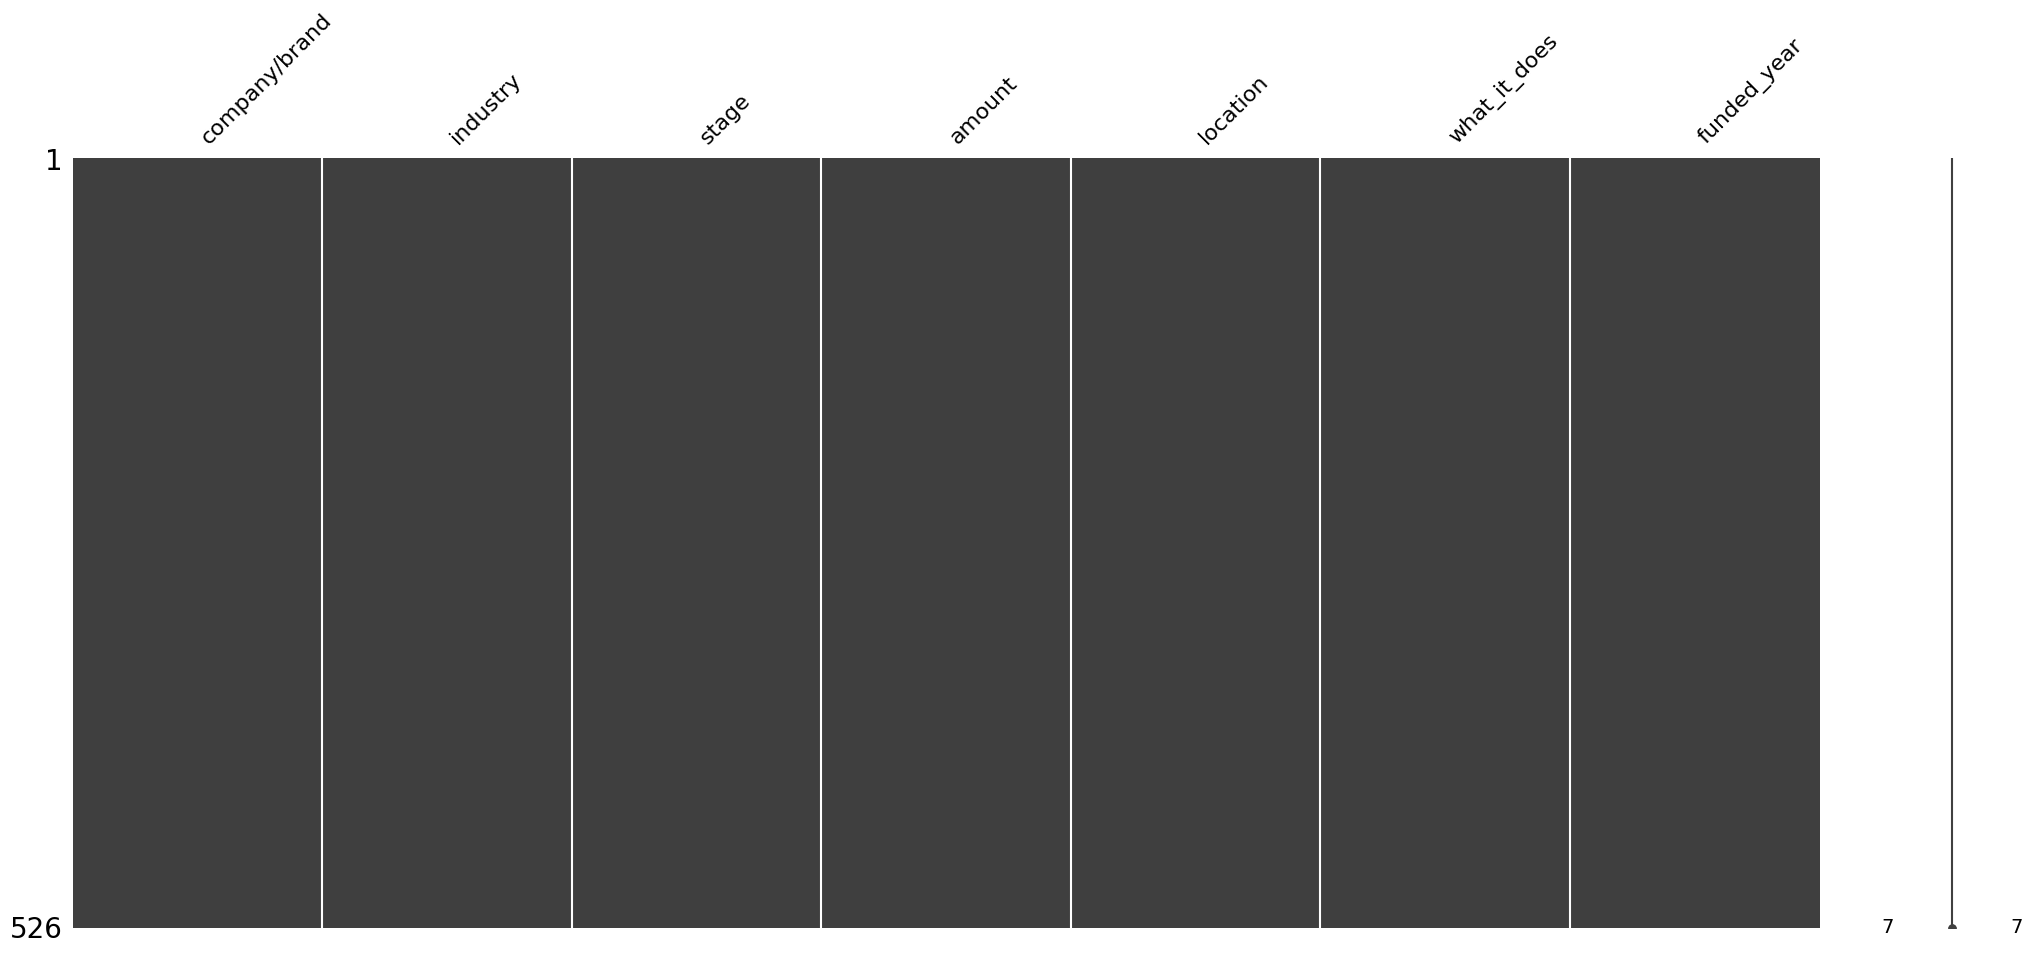

In [440]:
# visualize null values before data c;eaning
missingno.matrix(df_2018)

In [441]:
# check for duplicated values
df_2018.duplicated().sum()

1

In [442]:
# drop the duolicate value
df_2018.drop_duplicates(inplace=True)


## Cleaning of the Amount Column
Exchange Rate Between USD and Indian Rupee as of 2018

1USD = 68.4933INR

source: https://www.poundsterlinglive.com/history/USD-INR-2018

assumption: All the amount values without any currencies are assumed to be in USD

In [443]:
df_2018["amount"].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [444]:
# create function to clean the amount column
exchange_rate = 68.4933
    
def clean_amount():
    # copy original amount columns
    amount_column = df_2018["amount"].copy().str.replace(",","") 
    # extract values in Rupees(₹)
    amount_in_rupee = amount_column[amount_column.str.startswith("₹")]
    # strip off the ₹ symbol
    amount_in_rupee = amount_in_rupee.str.lstrip("₹")
    # convert the amount in rupee to USD by the exchange rate of 68.4933
    amount_in_rupee = amount_in_rupee.apply(lambda x: float(x)/exchange_rate)
    # extract values in dollars($)
    amount_in_dollar = amount_column[amount_column.str.startswith("$")]
    # strip off the dollar symbol
    amount_in_dollar = amount_in_dollar.str.lstrip("$")
    # Replace the Unclean columns with the clean one
    amount_column.loc[amount_in_rupee.index] = amount_in_rupee
    amount_column.loc[amount_in_dollar.index] = amount_in_dollar
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    df_2018["amount"] = amount_column




In [445]:
# call the clean_amount function
clean_amount()

In [446]:
# check info about the dataset after cleaning
df_2018.isnull().sum()


company/brand      0
industry           0
stage              0
amount           148
location           0
what_it_does       0
funded_year        0
dtype: int64

## Visualizing Data Again After Cleaning The Amount Column

<Axes: >

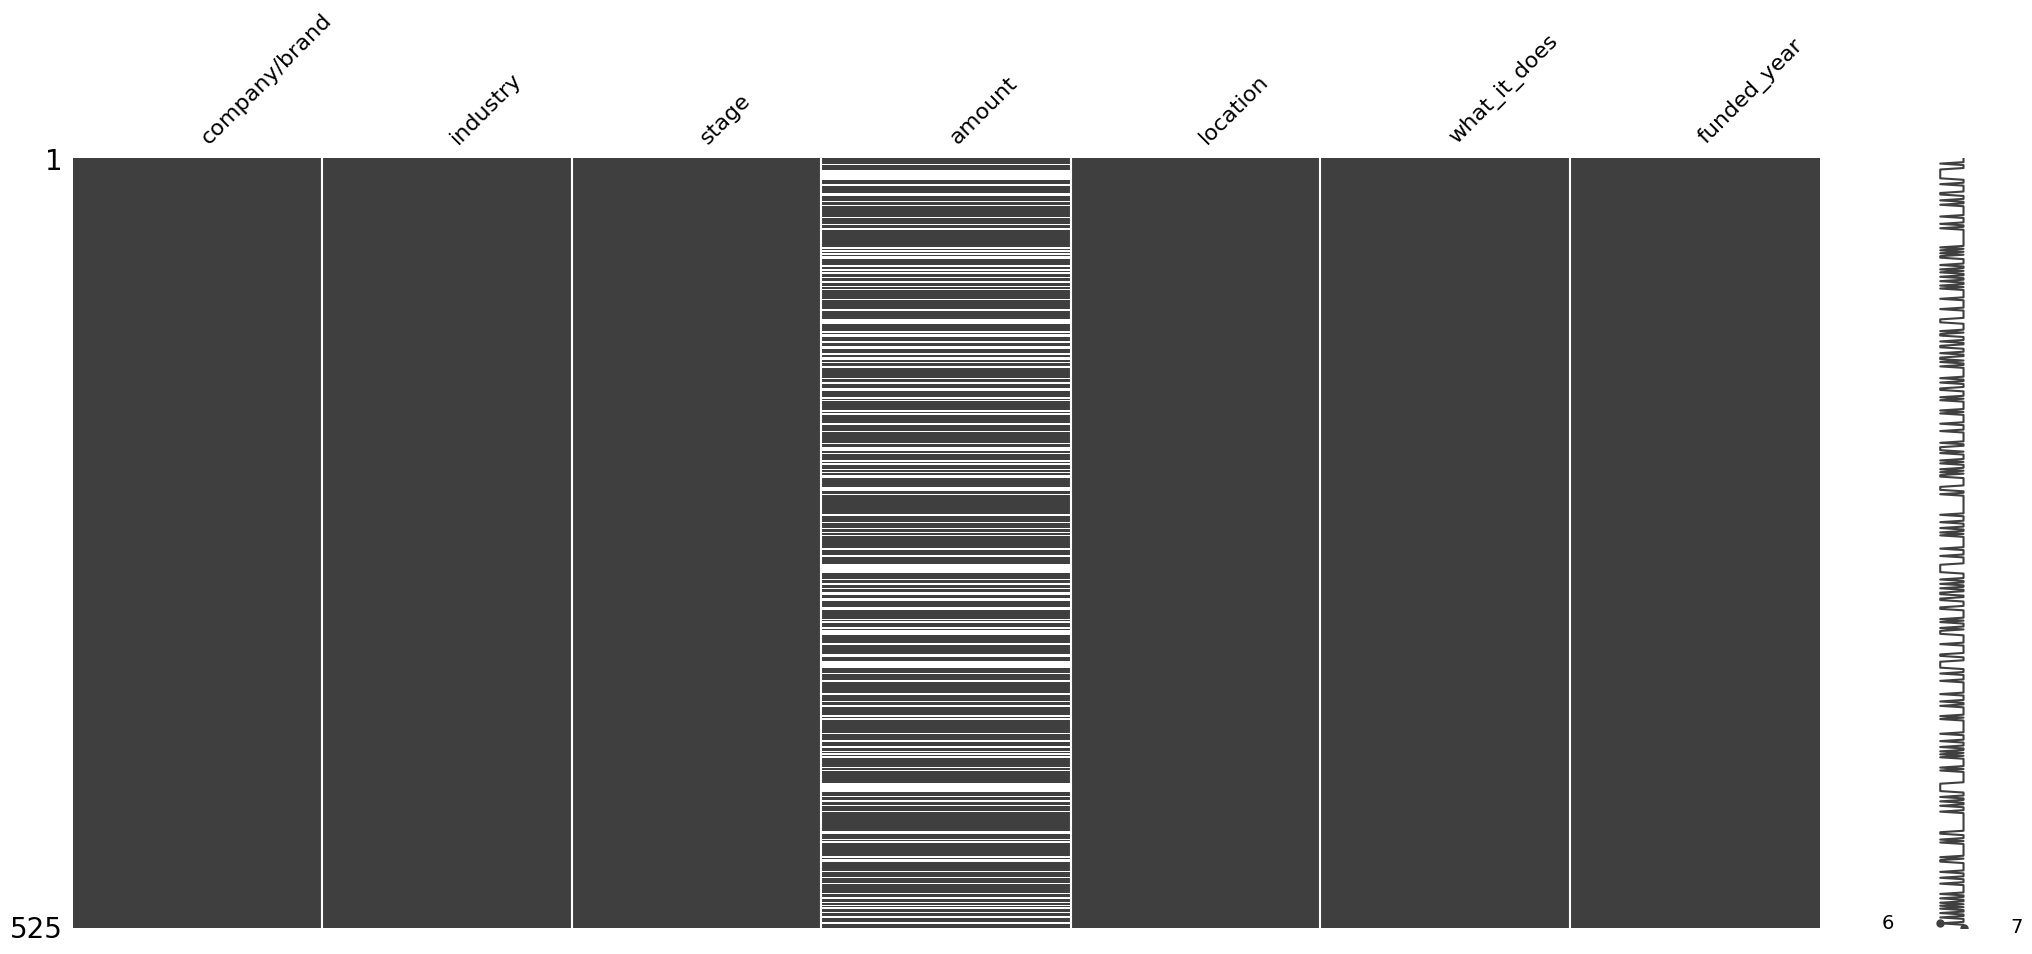

In [447]:
missingno.matrix(df_2018)

In [448]:
# perform a discriptive statistics on the new dataset
df_2018.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,525,525,TheCollegeFever,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,525,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,525,21,Seed,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,377.0,NaN,NaN,NaN,17616765.176312,77972595.460917,875.99809,500000.0,1300000.0,5000000.0,1000000000.0
location,525,50,"Bangalore, Karnataka, India",101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,525,524,Algorithmic trading platform.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year,525.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


### Cleaning the stage column 

In [449]:
df_2018.stage.unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [450]:
#Clean the Stage column categorize them
 
modified_stage = {
    'Seed': 'Seed funding',
    'Angel': 'Seed funding',
    'Venture - Series Unknown': 'Series A',
    'Debt Financing': 'Series A',
    'Grant': 'Seed funding',
    'Pre-Seed': 'Pre-Seed funding',
    'Funding Round': 'Pre-Seed funding',
    'Fresh funding': 'Pre-Seed funding',
    'Pre series A': 'Series A',
    'Post series A': 'Series A',
    'Seed fund': 'Seed funding',
    'Series B+': 'Series B',
    'Seed round': 'Seed funding',
    'Pre-seed' : 'Pre-Seed funding',
    'Seed A': 'Seed funding',
    'Pre-series A' : 'Series A',
    'Pre-series' : 'Pre-Seed funding',
    'Pre-series C' : 'Series C',
    'Pre-series B' : 'Series B',
    'Pre- series A' : 'Series A',
    'Pre-Series B' : 'Series B',
    'Series A-1' : 'Series A',
    'Seies A': 'Series A',
    'Seed Funding' : 'Seed funding',
    'Pre-Seed' : 'Pre-Seed funding',
    'Seed round': 'Seed funding' ,
    'Pre-seed Round': 'Pre-Seed funding',
    'Pre Series A' : 'Series A',
    'Pre seed Round': 'Pre-Seed funding',
    'Angel Round' :  'Seed funding',
    'Pre series A1': 'Series A',
    'Pre series A' : 'Series A',
    'Seed Round' : 'Seed funding',
    'Pre seed round' : 'Pre-Seed funding',
    'Pre series B' : 'Series B',
    'Pre series C' : 'Series B',
    'Seed Investment': 'Seed funding',
    'Seed+' : 'Seed funding',
    'Series A+' : 'Series A',
    'PE' : 'Private Equity',
    'Pre-series A1' : 'Series A',
    'Early seed' : 'Pre-Seed funding',
    'Series B2' : 'Series B',
    'Series E2' : 'Series E',
    'Series D1' : 'Series D',
    'Series B3' : 'Series B',
    'Series F1' : 'Series F',
    'Series A2' : 'Series A',
    'Series F2':'Series F',
    'Series C, D': 'Series C',
    'Bridge Round': 'Bridge',
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' : 'None',
    'ah! Ventures':'Series A', 
    'ITO Angel Network, LetsVenture': 'Seed funding',
    'JITO Angel Network, LetsVenture': 'Seed Funding', 
}

In [451]:
# Replacing the sector column values with the new sectors
df_2018["stage"]= df_2018["stage"].replace(modified_stage)
df_2018.stage.unique()

array(['Seed funding', 'Series A', 'Series B', 'Pre-Seed funding',
       'Private Equity', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'None', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance'],
      dtype=object)

## Observations
- There is a vast difference between the mean and the median of the amount column which suggests outliers present in the dataset
- There exists some null values still present in the dataset 

## Course Of Actions
Fillna Values in the amount column:Impute the NaN values in the amount column with the median because of the outliers

In [452]:
# Function to fill NaN values in the amount column with the average based on stage of company
def impute_amount_column(df,filter_name,fill_value):
    unique_values = df[filter_name].unique()
    for val, avg_amount in zip(unique_values,df.groupby(filter_name)[fill_value].transform('median')):
        df.loc[df[filter_name] == val, fill_value] = df.loc[df[filter_name] == val, fill_value].fillna(avg_amount)
    return df
     


In [453]:
# call the impute_amount_column function
df_2018 = impute_amount_column(df_2018,"stage","amount")

In [454]:
# Split the Industry Column
industry_split = df_2018["industry"].str.split(",", expand=True)
industry_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brand Marketing,Event Promotion,Marketing,Sponsorship,Ticketing,None,None,None,None,None,None,None
1,Agriculture,Farming,None,None,None,None,None,None,None,None,None,None
2,Credit,Financial Services,Lending,Marketplace,None,None,None,None,None,None,None,None
3,Financial Services,FinTech,None,None,None,None,None,None,None,None,None,None
4,E-Commerce Platforms,Retail,SaaS,None,None,None,None,None,None,None,None,None


In [455]:
# concatenate industry_split with the original df_2018
df_2018 = pd.concat([df_2018,industry_split[0]], ignore_index=False, axis=1)
df_2018.head(1)

,company/brand,industry,stage,amount,location,what_it_does,funded_year,0
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed funding,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Brand Marketing


In [456]:
# Rename the column 0 to sector
df_2018 = df_2018.rename(columns={0:"sector"})
df_2018.head()

,company/brand,industry,stage,amount,location,what_it_does,funded_year,sector
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed funding,2.500000e+05,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Brand Marketing
1,Happy Cow Dairy,"Agriculture, Farming",Seed funding,5.839987e+05,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Agriculture
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9.489979e+05,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Credit
3,PayMe India,"Financial Services, FinTech",Seed funding,2.000000e+06,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Financial Services
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed funding,5.669994e+05,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,E-Commerce Platforms


In [457]:
# Rename the column 0 to sector
df_2018 = df_2018.drop(columns={"industry"})

## Restructuring the Sector Column into Key Sectors of the Economy
source: https://www.businessinsider.in/business/startups/news/top-10-industries-for-new-startups-in-india-as-per-hurun-list/articleshow/105651758.cms

In [458]:
# Check for unique values in the sector column 

df_2018["sector"].sort_values().unique()

array(['3D Printing', 'Accounting', 'Advertising', 'Aerospace', 'AgTech',
       'Agriculture', 'Air Transportation', 'Alternative Medicine',
       'Analytics', 'Android', 'Apps', 'Artificial Intelligence', 'Audio',
       'Automotive', 'Autonomous Vehicles', 'B2B', 'Banking',
       'Basketball', 'Battery', 'Beauty', 'Big Data', 'Biopharma',
       'Biotechnology', 'Blockchain', 'Brand Marketing', 'Broadcasting',
       'Business Development', 'Business Intelligence', 'Business Travel',
       'Career Planning', 'Catering', 'Child Care', 'Children',
       'Classifieds', 'Clean Energy', 'CleanTech', 'Cloud Computing',
       'Cloud Infrastructure', 'Collaboration', 'Commercial',
       'Commercial Real Estate', 'Communities', 'Computer', 'Consulting',
       'Consumer', 'Consumer Applications', 'Consumer Electronics',
       'Consumer Goods', 'Consumer Lending', 'Continuing Education',
       'Cooking', 'Cosmetics', 'Creative Agency', 'Credit',
       'Credit Cards', 'Crowdfunding', 

From research, there are 12 sectors in India where all these values in the sector column of the dataset can be generalised into. They are therefore mapped onto the 12 sectors which include:

- IT & Technology               
- Financial Services             
- Healthcare                     
- Consumer Goods                 
- Business Services              
- Media & Entertainment         
- Education                      
- Others                         
- Manufacturing                  
- Retail                         
- Hospitality                    
- Transportation & Logistics     
- Sports                         
- Agriculture                    
- Real Estate      

In [459]:
sector_mapping = {
    '3D Printing': 'IT & Technology',
    'Accounting': 'Business Services',
    'Advertising': 'Media & Entertainment',
    'Aerospace': 'Manufacturing',
    'AgTech': 'Agriculture',
    'Agriculture': 'Agriculture',
    'Air Transportation': 'Transportation & Logistics',
    'Alternative Medicine': 'Healthcare',
    'Analytics': 'IT & Technology',
    'Android': 'IT & Technology',
    'Apps': 'IT & Technology',
    'Artificial Intelligence': 'IT & Technology',
    'Audio': 'Media & Entertainment',
    'Automotive': 'Manufacturing',
    'Autonomous Vehicles': 'Manufacturing',
    'B2B': 'Business Services',
    'Banking': 'Financial Services',
    'Basketball': 'Sports',
    'Battery': 'IT & Technology',
    'Beauty': 'Consumer Goods',
    'Big Data': 'IT & Technology',
    'Biopharma': 'Healthcare',
    'Biotechnology': 'Healthcare',
    'Blockchain': 'IT & Technology',
    'Brand Marketing': 'Media & Entertainment',
    'Broadcasting': 'Media & Entertainment',
    'Business Development': 'Business Services',
    'Business Intelligence': 'Business Services',
    'Business Travel': 'Business Services',
    'Career Planning': 'Business Services',
    'Catering': 'Hospitality',
    'Child Care': 'Business Services',
    'Children': 'Consumer Goods',
    'Classifieds': 'Media & Entertainment',
    'Clean Energy': 'IT & Technology',
    'CleanTech': 'IT & Technology',
    'Cloud Computing': 'IT & Technology',
    'Cloud Infrastructure': 'IT & Technology',
    'Collaboration': 'IT & Technology',
    'Commercial': 'Real Estate',
    'Commercial Real Estate': 'Real Estate',
    'Communities': 'IT & Technology',
    'Computer': 'IT & Technology',
    'Consulting': 'Business Services',
    'Consumer': 'Consumer Goods',
    'Consumer Applications': 'IT & Technology',
    'Consumer Electronics': 'Consumer Goods',
    'Consumer Goods': 'Consumer Goods',
    'Consumer Lending': 'Financial Services',
    'Continuing Education': 'Education',
    'Cooking': 'Hospitality',
    'Cosmetics': 'Consumer Goods',
    'Creative Agency': 'Business Services',
    'Credit': 'Financial Services',
    'Credit Cards': 'Financial Services',
    'Crowdfunding': 'Financial Services',
    'Crowdsourcing': 'Business Services',
    'Cryptocurrency': 'Financial Services',
    'Customer Service': 'Business Services',
    'Dating': 'Media & Entertainment',
    'Delivery': 'Transportation & Logistics',
    'Delivery Service': 'Transportation & Logistics',
    'Dental': 'Healthcare',
    'Dietary Supplements': 'Healthcare',
    'Digital Entertainment': 'Media & Entertainment',
    'Digital Marketing': 'Media & Entertainment',
    'Digital Media': 'Media & Entertainment',
    'E-Commerce': 'Retail',
    'E-Commerce Platforms': 'Retail',
    'E-Learning': 'Education',
    'EdTech': 'Education',
    'Education': 'Education',
    'Electric Vehicle': 'Transportation & Logistics',
    'Embedded Systems': 'IT & Technology',
    'Energy': 'IT & Technology',
    'Enterprise Resource Planning (ERP)': 'IT & Technology',
    'Enterprise Software': 'IT & Technology',
    'Environmental Consulting': 'Business Services',
    'Events': 'Hospitality',
    'Eyewear': 'Consumer Goods',
    'Facilities Support Services': 'Business Services',
    'Fantasy Sports': 'Sports',
    'Farming': 'Agriculture',
    'Fashion': 'Consumer Goods',
    'File Sharing': 'IT & Technology',
    'FinTech': 'Financial Services',
    'Finance': 'Financial Services',
    'Financial Services': 'Financial Services',
    'Fitness': 'Sports',
    'Food Delivery': 'Hospitality',
    'Food Processing': 'Consumer Goods',
    'Food and Beverage': 'Consumer Goods',
    'Fraud Detection': 'Financial Services',
    'Funding Platform': 'Financial Services',
    'Gaming': 'Media & Entertainment',
    'Government': 'Business Services',
    'Health Care': 'Healthcare',
    'Health Diagnostics': 'Healthcare',
    'Health Insurance': 'Financial Services',
    'Home Decor': 'Consumer Goods',
    'Hospital': 'Healthcare',
    'Hospitality': 'Hospitality',
    'Human Resources': 'Business Services',
    'Industrial': 'Manufacturing',
    'Industrial Automation': 'Manufacturing',
    'Information Services': 'IT & Technology',
    'Information Technology': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Internet': 'IT & Technology',
    'Internet of Things': 'IT & Technology',
    'Last Mile Transportation': 'Transportation & Logistics',
    'Logistics': 'Transportation & Logistics',
    'Manufacturing': 'Manufacturing',
    'Market Research': 'Business Services',
    'Marketing': 'Media & Entertainment',
    'Marketplace': 'Retail',
    'Media and Entertainment': 'Media & Entertainment',
    'Medical': 'Healthcare',
    'Medical Device': 'Healthcare',
    'Mobile': 'IT & Technology',
    'Mobile Payments': 'Financial Services',
    'Music': 'Media & Entertainment',
    'Music Streaming': 'Media & Entertainment',
    'Nanotechnology': 'IT & Technology',
    'News': 'Media & Entertainment',
    'Online Games': 'Media & Entertainment',
    'Online Portals': 'Media & Entertainment',
    'Packaging Services': 'Manufacturing',
    'Reading Apps': 'Media & Entertainment',
    'Renewable Energy': 'IT & Technology',
    'Rental': 'Real Estate',
    'Retail': 'Retail',
    'Search Engine': 'IT & Technology',
    'Smart Cities': 'IT & Technology',
    'Social Media': 'Media & Entertainment',
    'Software': 'IT & Technology',
    'Sports': 'Sports',
    'Tourism': 'Hospitality',
    'Trading Platform': 'Financial Services',
    'Training': 'Education',
    'Transportation': 'Transportation & Logistics',
    'Travel': 'Hospitality',
    'Veterinary': 'Healthcare',
    'Wealth Management': 'Financial Services',
    'Wedding': 'Hospitality',
    'Wellness': 'Healthcare',
    'eSports': 'Sports',
    '—': 'Others'
}


In [460]:
# Replacing the sector column values with the new sectors
df_2018["sector"]= df_2018["sector"].replace(sector_mapping)
df_2018.head(2)

,company/brand,stage,amount,location,what_it_does,funded_year,sector
0,TheCollegeFever,Seed funding,250000.000000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Media & Entertainment
1,Happy Cow Dairy,Seed funding,583998.726883,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Agriculture


In [461]:
df_2018["sector"].value_counts()

sector
IT & Technology               116
Financial Services             77
Healthcare                     45
Consumer Goods                 44
Business Services              36
Media & Entertainment          32
Education                      31
Others                         30
Manufacturing                  29
Retail                         26
Hospitality                    19
Transportation & Logistics     14
Sports                         12
Agriculture                    10
Real Estate                     4
Name: count, dtype: int64

In [462]:
others_cat = df_2018[df_2018["sector"] == "Others" ]
others_cat

,company/brand,stage,amount,location,what_it_does,funded_year,sector
58,MissMalini Entertainment,Seed funding,1.518397e+06,"Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,2018,Others
105,Jagaran Microfin,Series A,8.029982e+06,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,2018,Others
121,FLEECA,Seed funding,5.669994e+05,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,2018,Others
146,WheelsEMI,Series B,1.400000e+07,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,Others
153,Fric Bergen,Series A,5.669994e+05,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,2018,Others
174,Deftouch,Seed funding,5.669994e+05,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...,2018,Others
181,Corefactors,Seed funding,5.669994e+05,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ...",2018,Others
210,Cell Propulsion,Seed funding,1.021998e+05,"Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...,2018,Others
230,Flathalt,Seed funding,5.000000e+04,"Gurgaon, Haryana, India",FInd your Customized Home here.,2018,Others
235,dishq,Seed funding,4.000000e+05,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...,2018,Others


## Recategorizing the Others Values into their appropriate sectors

In [463]:
# view the descriptions of the companies with the others categories
others_cat["what_it_does"]

58     MissMalini Entertainment is a multi-platform n...
105    Jagaran Microfin is a Microfinance institution...
121              FLEECA is a Tyre Care Provider company.
146    WheelsEMI is the brand name of NBFC, WheelsEMI...
153    Fric Bergen is a leader in the specialty food ...
174    Deftouch is a mobile game development company ...
181    Corefactors is a leading campaign management, ...
210    Cell Propulsion is an electric mobility startu...
230                      FInd your Customized Home here.
235    dishq leverages food science and machine learn...
238    Trell is a location based network which helps ...
242          New Apartments, Flats for Sale in Bangalore
243    It is a fabless semiconductor company focused ...
247    SaffronStays connects travellers to India's In...
251    Inner Being Wellness manufactures beauty, well...
257    SEO, PPC, Search Engine Marketing, Social Medi...
258                             Digital Marketing Agency
259    Scale Labs is a cross bo

In [464]:
# create dictionary to contain the keywords in the what_it_does column
keywords = {
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Hospitality',
    'beauty, wellness': 'Fashion & Wellness',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Hospitality',
    'edutech': 'Education'
}


In [465]:

# Function to assign sector based on description
def assign_sector(what_it_does):
    for keyword,sector in keywords.items():
        if keyword in what_it_does.lower():
            return sector
    return "Others" #Keep Others if no keyword matches


In [466]:
# Update sectors for entries currently labeled as "Others"
df_2018.loc[df_2018['sector'] == 'Others', 'sector'] = df_2018.loc[df_2018['sector'] == 'Others', 'what_it_does'].apply(assign_sector)


In [467]:
# confirm changes
df_2018["sector"].value_counts()

sector
IT & Technology               121
Financial Services             82
Consumer Goods                 48
Healthcare                     45
Business Services              40
Media & Entertainment          33
Education                      32
Manufacturing                  29
Retail                         26
Hospitality                    20
Transportation & Logistics     15
Sports                         12
Agriculture                    10
Others                          7
Real Estate                     4
Fashion & Wellness              1
Name: count, dtype: int64

## Cleaning the Location Column

### Observations From The Column
- The format of the data found in the column mostly are city,state,country format
### Tasks to Performed
- Split the Column values by comma
- Drop the state and the country columns
- Retain the city column and rename it headquarter to be in-line with the other three datasets

In [468]:
# look for unique values in the location column
df_2018["location"].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [469]:
# Split the location Column
df_2018[["headquarter", "state","country"]] = df_2018["location"].str.split(",", n=2, expand=True)
df_2018.head(1)

,company/brand,stage,amount,location,what_it_does,funded_year,sector,headquarter,state,country
0,TheCollegeFever,Seed funding,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Media & Entertainment,Bangalore,Karnataka,India


In [470]:
# check for the unique states in the dataset
df_2018["state"].unique()

array([' Karnataka', ' Maharashtra', ' Haryana', ' Uttar Pradesh',
       ' Andhra Pradesh', ' Delhi', ' Asia', ' Tamil Nadu', ' Punjab',
       ' West Bengal', ' Rajasthan', ' Gujarat', ' Kerala', ' Goa',
       ' Madhya Pradesh', ' India', ' Assam', ' Chandigarh'], dtype=object)

In [471]:
# drop the state column 
df_2018.drop(columns={"state"},inplace=True)

In [472]:
# drop the country column 
df_2018.drop(columns={"country"},inplace=True)

In [473]:
df_2018['headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [474]:
# Modified location mapping
modified_location ={
    'Bengaluru': 'Bangalore',
    'Delhi': 'New Delhi',
    'Bangalore City' : 'Bangalore',
    #'Gurgaon' : 'Gurugram',
    'Haryana': 'Chandigarh',
    'Uttar Pradesh' : 'Noida',
    'Uttar pradesh' : 'Noida',
    'Tamil Nadu': 'Chennai',
    'Faridabad, Haryana': 'Faridabad',
    'Computer Games': 'Undisclosed',
    'Telangana': 'Hyderabad',  # 2019
    'Dhingsara, Haryana': 'Chandigarh',
    'The nilgiris': 'Chennai',
    'Santra': 'Bhopal',
    'India': 'New delhi',
    'Gurugram\\t#ref!': 'Gurgaon',
    '"Gurugram\t#ref!"': 'Gurgaon',
    'Banglore': 'Bangalore',
    'Singapore': 'Overseas',
    'Frisco, Texas, United States': 'Overseas',
    'California': 'Overseas',
    'New York, United States': 'Overseas',
    'San Francisco, California, United States': 'Overseas',
    'San Francisco, United States': 'Overseas',
    'San Ramon, California': 'Overseas',
    'Paris, Ile-de-France, France': 'Overseas',
    'Plano, Texas, United States': 'Overseas',
    'Sydney': 'Overseas',
    'San Francisco Bay Area, Silicon Valley, West Coast': 'Overseas',
    'Bangaldesh': 'Overseas',
    'London, England, United Kingdom': 'Overseas',
    'Sydney, New South Wales, Australia': 'Overseas',
    'Milano, Lombardia, Italy': 'Overseas',
    'Palmwoods, Queensland, Australia': 'Overseas',
    'France': 'Overseas',
    'San Francisco Bay Area, West Coast, Western US': 'Overseas',
    'Tangerang, Jawa Barat, Indonesia': 'Overseas',
    'Berlin': 'Overseas',
    'Seattle': 'Overseas',
    'Riyadh': 'Overseas',
    'Seoul': 'Overseas',
    'New York': 'Overseas',
    'Bangkok': 'Overseas',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom': 'Overseas',
    'Shanghai, China': 'Overseas',
    'Jiaxing, Zhejiang, China': 'Overseas',
    'Irvine, California, United States': 'Overseas',
    'San Franciscao' : 'Overseas',
    'San Francisco': 'Overseas',
    'Jaipur, Rajastan': 'Jaipur',
    'Rajastan': "Jaipur",
    'Tumkur, Karnataka': 'Tumkur',
    'Samastipur, Bihar': 'Samastipur',
    #'None' : 'Undisclosed',
    'Tumkur, Karnataka' : 'Tumkur',
    'Information Technology & Services': 'Undisclosed',
    'Tirunelveli, Tamilnadu': 'Tirunelveli',
    'Trivandrum, Kerala, India': 'Trivandrum',
    'Manchester': 'Overseas',
    'Mountain View, CA' : 'Overseas',
    'London' : 'Overseas',
    'The Nilgiris' :'Chennai',
    'Beijing' : 'Overseas',
    'Small Towns, Andhra Pradesh': 'Amaravati',
    'Goa' : 'Panaji',
    'West Bengal' : 'Kolkata',
    'Telugana': 'Telangana',
    'Orissia': 'Odisha',
    'Jharkhand': 'Ranchi',
    'Thiruvananthapuram': 'Trivandrum',
    'Gurugram\t#REF!': 'Gurgaon',
    'Hauz Khas': 'New Delhi'
   
 
 
}

In [475]:
df_2018.replace({'headquarter': modified_location}, inplace=True)

In [476]:
df_2018["headquarter"] = df_2018["headquarter"].replace("India","New Delhi")

In [477]:
# confirm changes
df_2018.head()

,company/brand,stage,amount,location,what_it_does,funded_year,sector,headquarter
0,TheCollegeFever,Seed funding,2.500000e+05,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Media & Entertainment,Bangalore
1,Happy Cow Dairy,Seed funding,5.839987e+05,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Agriculture,Mumbai
2,MyLoanCare,Series A,9.489979e+05,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Financial Services,Gurgaon
3,PayMe India,Seed funding,2.000000e+06,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Financial Services,Noida
4,Eunimart,Seed funding,5.669994e+05,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Retail,Hyderabad


## Visualizing Null Values After Cleaning The 2018 Dataset


<Axes: >

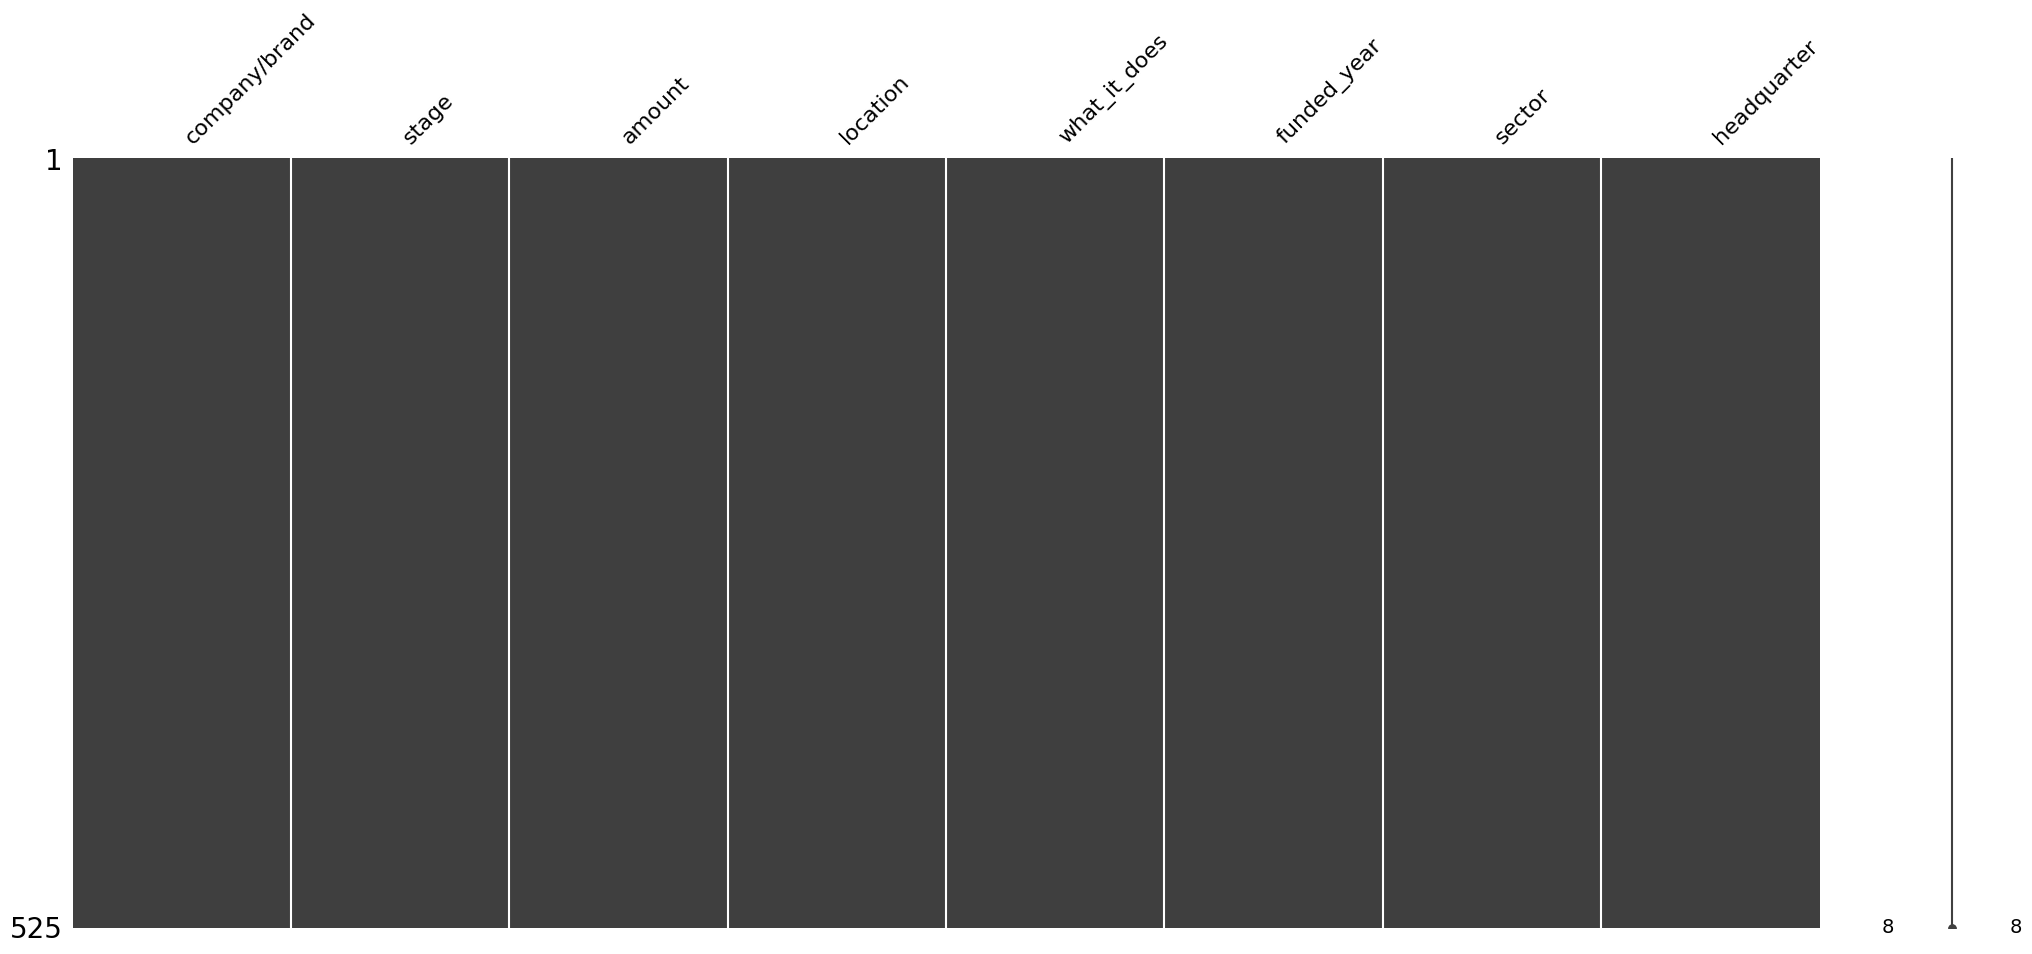

In [478]:
missingno.matrix(df_2018)

## Data Cleaning on the 2019 Dataset

In [479]:
# load the dataset
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [480]:
# check the shape of the dataset
df_2019.shape

(89, 9)

In [481]:
df_2019= df_2019.rename(columns=lambda x: x.lower().replace(' ', '_')) 
#renaming columns
df_2019 = df_2019.rename(columns={ "amount($)":"amount"})
#adding year column
df_2019["funded_year"] = 2019

In [482]:
df_2019.drop_duplicates(inplace=True)

In [483]:
# perform a descriptive stattics on the dataset
df_2019.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
headquarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


## Observations On Dataset
- The dataset consists of 89 rows and 9 columns
- From the description, we can deduce that most companies in founded in 2019 was found in Bangalore
- Edtech too appeared to be the sector with the most companies
- The amount of funding is in dollars as compared to the 2018 which was in both dollars, rupees and unattched currencies.
 

In [484]:
# check info about the dataset
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company/brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
 9   funded_year    89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


## Observations
- The are 8 columns out of the 9 columns with the Object Datatype
- There exists null values in some columns which must be dealt with

## Course of Actions
- Convert the Amount($) datatype from object to float
- Drop Null Values where necessary
- Fill in Null values where necesssary

In [485]:
# check for nulls
df_2019.isnull().sum()

company/brand     0
founded          29
headquarter      19
sector            5
what_it_does      0
founders          3
investor          0
amount            0
stage            46
funded_year       0
dtype: int64

## Visualizing Null Values Before Cleaning The 2019 Dataset


<Axes: >

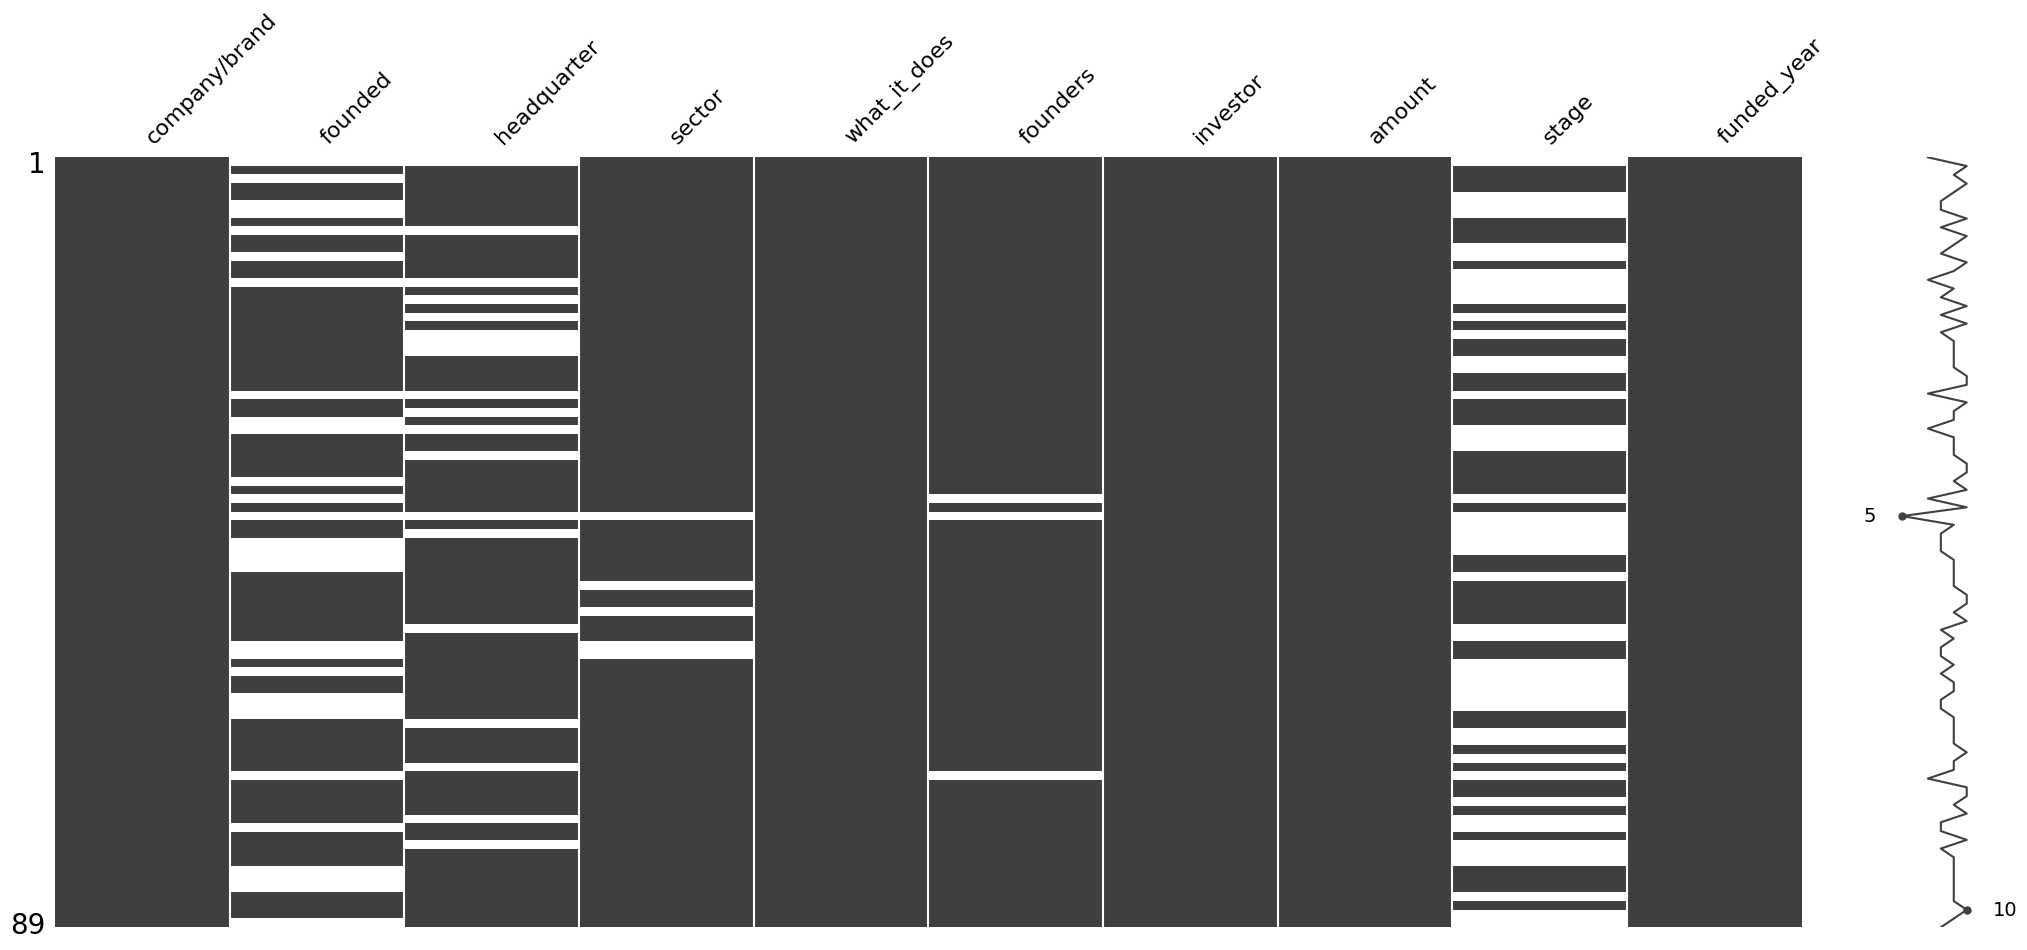

In [486]:
missingno.matrix(df_2019)

- Columns With No Nulls: Company/Brand, What it does, Investor, Amount
- Columns With Null Values: Stage, Founders, Sector, Headquarter,Founded

# Data Assesment
After the data was loaded from the 2019 source, the data was Visually and Programatically assessed on Quality Issues.

## Data Quality Issues
I identified several data quality issues while exploring the dataset
1. Missing values and duplicates: There exists some null values within the dataset which I should deal with.
2. Incosistent Values in the Amount,Sector,Location.,Industry Column: The following columns contain a lot of inconsistent values which needs to be looked at.
3. The Amount column is an object datype which must be changed to float
4. The Sector column too must be categorized into the new key sectors



### Cleaning the amount column

In [487]:
# check for unique values in the column
df_2019.amount.unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [488]:
# locate the Undiclosed values in the dataframe
df_2019.loc[df_2019.amount== 'Undisclosed']

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN,2019
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,Undisclosed,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,NaN,2019


In [489]:
#creating a function on amount column for 2019
def clean_amount():
    # copy original amount columns
    amount_column = df_2019["amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar = amount_column[amount_column.str.startswith("$")]
    # strip off the dollar symbol
    amount_in_dollar = amount_in_dollar.str.lstrip("$")
    # Replace the Unclean columns with the clean one

    amount_column.loc[amount_in_dollar.index] = amount_in_dollar
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    df_2019["amount"] = amount_column

In [490]:
# call the clean_amount function
clean_amount()

In [491]:
# confirm changes after cleaning
df_2019.amount.unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [492]:
# check for null values in the amount column
df_2019["amount"].isnull().sum()

12

In [493]:
# perform a descriptive statistics on the new dataset
df_2019.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
headquarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,77.0,NaN,NaN,NaN,43330301.298701,110621589.914765,100000.0,2100000.0,6000000.0,30000000.0,693000000.0
stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


Because of the huge difference between the mean and the median of the amount column,there is a possibility of outliers in that column so I will impute the missing values with the median

In [494]:
# call the impute_amount_column function
df_2019 = impute_amount_column(df_2019,"stage","amount")

In [495]:
# confirm changes
df_2019["amount"].isnull().sum()

10

### Cleaning the stage column for 2019

In [496]:
# Replacing the sector column values with the new sectors
df_2019["stage"]= df_2019["stage"].replace(modified_stage)
df_2019.stage.unique()

array([nan, 'Series C', 'Pre-Seed funding', 'Series D', 'Series A',
       'Series G', 'Series B', 'Seed funding', 'Series E', 'Series F'],
      dtype=object)

## Cleaning The Sector Column

In [497]:
# Check for unique values in the sector column 

df_2019["sector"].sort_values().unique()

array(['AI', 'AI & Tech', 'Accomodation', 'AgriTech', 'Automobile',
       'Automobile & Technology', 'Automotive tech', 'B2B',
       'B2B Supply Chain', 'Banking', 'Cosmetics', 'Cybersecurity',
       'E-Sports', 'E-commerce', 'E-commerce & AR', 'E-marketplace',
       'Ecommerce', 'Edtech', 'Fintech', 'Food', 'Food & Nutrition',
       'Food & tech', 'Food tech', 'Foodtech', 'Games', 'HR tech',
       'Health', 'Healthcare', 'Healthtech', 'Hospitality', 'Infratech',
       'Insurance technology', 'Interior design', 'IoT', 'Jewellery',
       'Legal tech', 'Logistics', 'Manufacturing',
       'Marketing & Customer loyalty', 'Mutual Funds', 'Pharmaceutical',
       'Robotics & AI', 'SaaS', 'Safety tech', 'Social Media', 'Sports',
       'Technology', 'Transport & Rentals', 'Transportation', 'Travel',
       'Virtual Banking', 'Yoga & wellness', nan], dtype=object)

In [498]:
sector_mapping = {
    'AI': 'IT & Technology',
    'AI & Tech': 'IT & Technology',
    'Accomodation': 'Hospitality',
    'AgriTech': 'Agriculture',
    'Automobile': 'Transportation & Logistics',
    'Automobile & Technology': 'Transportation & Logistics',
    'Automotive tech': 'Transportation & Logistics',
    'B2B': 'Business Services',
    'B2B Supply Chain': 'Business Services',
    'Banking': 'Financial Services',
    'Cosmetics': 'Consumer Goods',
    'Cybersecurity': 'IT & Technology',
    'E-Sports': 'Media & Entertainment',
    'E-commerce': 'Retail',
    'E-commerce & AR': 'Retail',
    'E-marketplace': 'Retail',
    'Ecommerce': 'Retail',
    'Edtech': 'Education',
    'Fintech': 'Financial Services',
    'Food': 'Consumer Goods',
    'Food & Nutrition': 'Consumer Goods',
    'Food & tech': 'Consumer Goods',
    'Food tech': 'Consumer Goods',
    'Foodtech': 'Consumer Goods',
    'Games': 'Media & Entertainment',
    'HR tech': 'Business Services',
    'Health': 'Healthcare',
    'Healthcare': 'Healthcare',
    'Healthtech': 'Healthcare',
    'Hospitality': 'Hospitality',
    'Infratech': 'Real Estate',
    'Insurance technology': 'Financial Services',
    'Interior design': 'Consumer Goods',
    'IoT': 'IT & Technology',
    'Jewellery': 'Consumer Goods',
    'Legal tech': 'Business Services',
    'Logistics': 'Transportation & Logistics',
    'Manufacturing': 'Manufacturing',
    'Marketing & Customer loyalty': 'Business Services',
    'Mutual Funds': 'Financial Services',
    'Pharmaceutical': 'Healthcare',
    'Robotics & AI': 'IT & Technology',
    'SaaS': 'IT & Technology',
    'Safety tech': 'IT & Technology',
    'Social Media': 'Media & Entertainment',
    'Sports': 'Sports',
    'Technology': 'IT & Technology',
    'Transport & Rentals': 'Transportation & Logistics',
    'Transportation': 'Transportation & Logistics',
    'Travel': 'Hospitality',
    'Virtual Banking': 'Financial Services',
    'Yoga & wellness': 'Healthcare'
}


In [499]:
# Replace the sector_mapping with the values in the sector column
df_2019["sector"]= df_2019["sector"].replace(sector_mapping)
df_2019.head()

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
0,Bombay Shaving,NaN,NaN,Retail,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Education,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Pre-Seed funding,2019
3,HomeLane,2014.0,Chennai,Consumer Goods,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,Agriculture,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [500]:
# confirm changes
df_2019["sector"].unique()

array(['Retail', 'Education', 'Consumer Goods', 'Agriculture',
       'IT & Technology', 'Financial Services', 'Business Services',
       'Healthcare', 'Transportation & Logistics', 'Hospitality',
       'Manufacturing', 'Media & Entertainment', nan, 'Sports',
       'Real Estate'], dtype=object)

In [501]:
# count indidvidual sectors
df_2019["sector"].value_counts()

sector
IT & Technology               16
Transportation & Logistics    11
Consumer Goods                10
Financial Services             9
Retail                         7
Education                      7
Business Services              5
Healthcare                     5
Agriculture                    4
Hospitality                    4
Media & Entertainment          3
Manufacturing                  1
Sports                         1
Real Estate                    1
Name: count, dtype: int64

In [502]:
# check for null values in the sector column
df_2019["sector"].isna().sum()


5

In [503]:
# Check for the null values withing the dataset
df_2019[pd.isnull(df_2019["sector"])]

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
41,VMate,NaN,NaN,NaN,A short video platform,NaN,Alibaba,100000000.0,NaN,2019
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...",4000000.0,Series A,2019
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,1500000.0,Series A,2019
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,26000000.0,Series B,2019
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel",5500000.0,Series A,2019


In [504]:
# Manual Filling of Null Values Based on the what_it_does
df_2019.loc[41,"sector"] = "Media & Entertainment"
df_2019.loc[49,"sector"] = "Business Services"
df_2019.loc[52,"sector"] = "Education",
df_2019.loc[56,"sector"] = "Financial Services",
df_2019.loc[57,"sector"] = "Retail"


In [505]:
# confirm changes
df_2019["sector"].isna().sum()

0

## Data Cleaning on the 2020 Dataset

In [506]:
# load dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [507]:
# check the shape of the dataset
df_2020.shape

(1055, 10)

In [508]:
# check for duplicates
df_2020.duplicated().sum()

3

In [509]:
# check for null Values in The Column
df_2020.isna().sum()


Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

## Visualize The 2020 dataset before Cleaning

<Axes: >

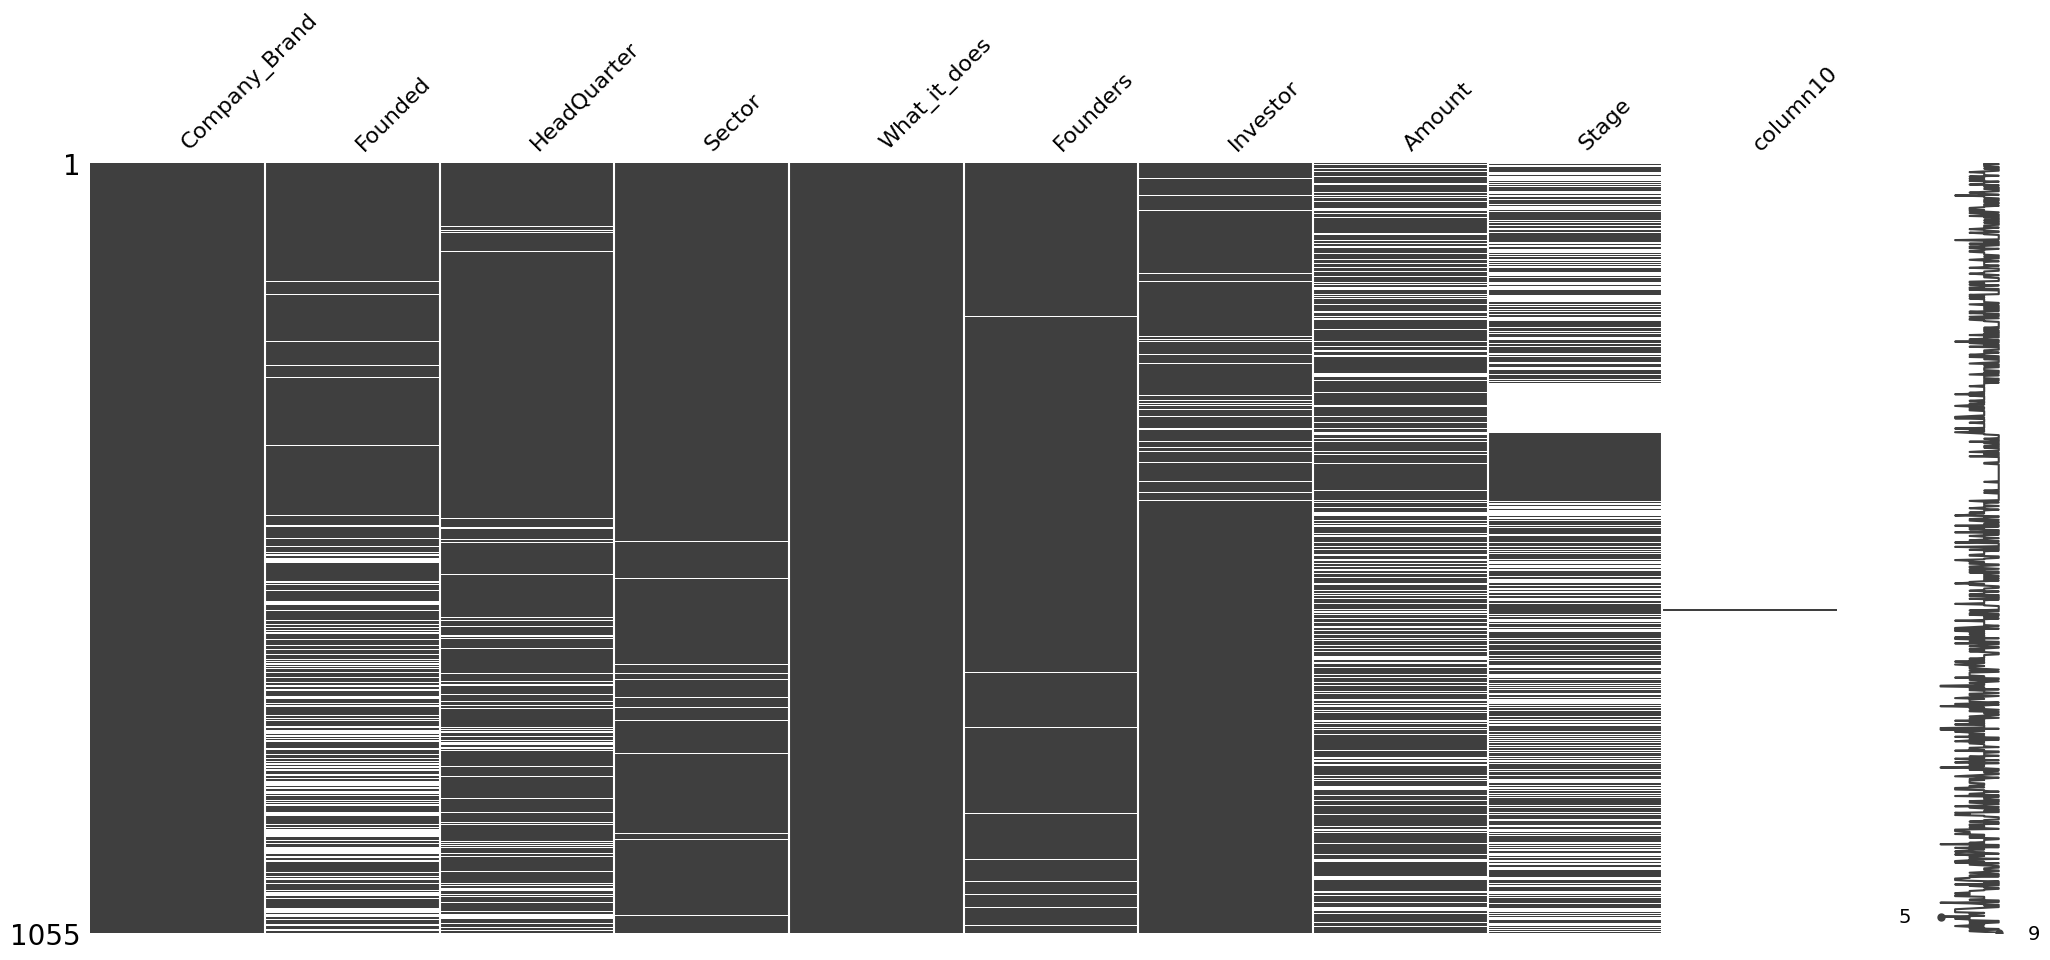

In [510]:
missingno.matrix(df_2020)

In [511]:
#First dropping unuseful columns 
df_2020.drop(columns =  "column10", inplace = True)

#Adding the year column
df_2020["funded_year"] = 2020

In [512]:
df_2020= df_2020.rename(columns=lambda x: x.lower().replace(' ', '_')) 
#dropping duplicates
df_2020.drop_duplicates(inplace=True)

In [513]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1052 non-null   object 
 1   founded        839 non-null    float64
 2   headquarter    958 non-null    object 
 3   sector         1039 non-null   object 
 4   what_it_does   1052 non-null   object 
 5   founders       1040 non-null   object 
 6   investor       1014 non-null   object 
 7   amount         799 non-null    float64
 8   stage          590 non-null    object 
 9   funded_year    1052 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 90.4+ KB


In [514]:
df_2020.isnull().sum()

company_brand      0
founded          213
headquarter       94
sector            13
what_it_does       0
founders          12
investor          38
amount           253
stage            462
funded_year        0
dtype: int64

There is no cleaning of the amount column in string format as it is already of datatype integer. It however has 253 null values that needs to be filled with the median

In [515]:
# Replacing the sector column values with the new sectors
df_2020["stage"]= df_2020["stage"].replace(modified_stage)
df_2020.stage.unique()

array([None, 'Pre-Seed funding', 'Seed funding', 'Series A', 'Series C',
       'Series B', 'Debt', 'Series E', 'Bridge', 'Series D', 'Series F',
       'Edge', 'Series H', 'Seed Round & Series A', 'Mid series'],
      dtype=object)

In [516]:
# call the impute_amount_column function
df_2020 = impute_amount_column(df_2020,"stage","amount")

## Data Cleaning on the 2021 Dataset

In [517]:
# Checking for counts of duplicates in dataset

df_2021.duplicated().sum()

19

In [518]:
# highlingting duplicated values

df_2021[df_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [519]:
# Drop duplicates
df_2021.drop_duplicates(inplace=True)

In [520]:
# Entries in wrong columns
df_2021.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


In [521]:
# Correcting entries in wrong columns
# LABEL 98 (FanPlay)
df_2021.loc[98, "Amount"] = "$1200000"
df_2021.loc[98, "Stage"] = "Undisclosed"
df_2021.loc[98, "Investor"] = "Upsparks"
df_2021.loc[98, "HeadQuarter"] = "Undisclosed"

# LABEL 241 (MasterChow)
df_2021.loc[241,  "HeadQuarter"] = "Hauz Khas"
df_2021.loc[241, "Sector"] = "Food & Beverages"

# LABEL 257(MoEVing)
df_2021.loc[257, "Amount"] = "$5000000"
df_2021.loc[257, "HeadQuarter"] = "Gurugram"
df_2021.loc[257, "Sector"] = "Electronic Vehicle"
df_2021.loc[257, "Stage"] = "Seed"
df_2021.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

# LABEL 242, 256(Fullife Healthcare)
df_2021.loc[242, "Amount"] = "$22000000"
df_2021.loc[242, "Investor"] = "Morgan Stanley Private Equity Asia"
df_2021.loc[242, "Stage"] = "Series C"
df_2021.loc[242, "HeadQuarter"] = "Mumbai"
df_2021.loc[242, "Sector"] = "Pharmaceuticals"
df_2021.loc[242, "Founders"] = "Varun Khanna"
df_2021.loc[242, "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

# LABEL 538 (Little Leap)
df_2021.loc[538, "Amount"] = "$300000"
df_2021.loc[538, "Investor"] = "ah! Ventures"
df_2021.loc[538, "Stage"] = "Undisclosed"
df_2021.loc[538, "Founders"] = "Vishal Gupta"

# LABEL 545 (AdmitKard)
df_2021.loc[545, "Amount"] = "$1000000"
df_2021.loc[545, "Investor"] = "Unknown"
df_2021.loc[545, "Stage"] = "Pre-series A"
df_2021.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

# LABEL 551 (BHyve)
df_2021.loc[551, "Amount"] = "$300000"
df_2021.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
df_2021.loc[551, "Stage"] = "Undisclosed"
df_2021.loc[551, "Sector"] = "HR"

# LABEL 674 (MYRE Capital)
df_2021.loc[674, "Amount"] = "$6000000"
df_2021.loc[674, "Stage"] = "Undisclosed"

# LABEL 677 (Saarthi Pedagogy)
df_2021.loc[677, "Amount"] = "$1000000"
df_2021.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
df_2021.loc[677, "Stage"] = "Undisclosed"

# LABEL 1100(Sochcast)
df_2021.loc[1100, "Investor"] = "Undisclosed"
df_2021.loc[1100, "HeadQuarter"] = "Undisclosed"
df_2021.loc[1100, "Sector"] = "Online Media"

# LABEL 1148 (Godamwale)
df_2021.loc[1148, "Amount"] = "1000000"
df_2021.loc[1148, "Investor"] = "Undisclosed"
df_2021.loc[1148, "Stage"] = "Seed"

# LABEL 1176(Peak)
df_2021.loc[1176, "Sector"] = "Information Technology & Services"
df_2021.loc[1176, "HeadQuarter"] = "Manchester"

In [522]:
# Confirm chages
df_2021.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Undisclosed,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,$1200000,Undisclosed
241,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.0,Mumbai,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C
257,MoEVing,2021.0,Gurugram,Electronic Vehicle,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Vishal Gupta,ah! Ventures,$300000,Undisclosed
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",Unknown,$1000000,Pre-series A
551,BHyve,2020.0,Mumbai,HR,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"ITO Angel Network, LetsVenture, 100x.VC",$300000,Undisclosed
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,Undisclosed
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"JITO Angel Network, LetsVenture",$1000000,Undisclosed
1100,Sochcast,2020.0,Undisclosed,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Undisclosed,None,None


In [523]:
#Cleaning the column names of the 2021_dataset
df_2021= df_2021.rename(columns=lambda x: x.lower().replace(' ', '_'))
#Adding the year column
df_2021["funded_year"] = 2021

In [524]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1190 non-null   object 
 1   founded        1189 non-null   float64
 2   headquarter    1189 non-null   object 
 3   sector         1190 non-null   object 
 4   what_it_does   1190 non-null   object 
 5   founders       1186 non-null   object 
 6   investor       1129 non-null   object 
 7   amount         1188 non-null   object 
 8   stage          773 non-null    object 
 9   funded_year    1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 134.6+ KB


### Cleaning the amount column for 2021

In [525]:
df_2021.amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [526]:
#checking for values that do not have the dollar sign attached to them for further investigation
df_2021[~df_2021.amount.str.get(0).isin(['$'])]

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A,2021
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",None,None,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,None,2021
319,Battery Smart,2019.0,New Delhi,Battery,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed,2021


In [527]:
df_2021.amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [528]:
# Remove the word with a value
df_2021['amount'] = df_2021['amount'].str.replace("1000000\t#REF!" , '1000000').replace('$Undisclosed', np.NaN).replace('$undisclosed',np.NaN).replace('Undisclosed', np.NaN)

In [529]:
#creating a function on amount column for 2021
def clean_amount():
    # copy original amount columns
    amount_column = df_2021["amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar_1 = amount_column[amount_column.str.startswith("$", na=False)]
    # strip off the dollar symbol
    amount_in_dollar_1 = amount_in_dollar_1.str.lstrip("$")

    # extract values in dollars($)
    amount_in_dollar_2 = amount_column[amount_column.str.startswith("$$", na=False)]

     # strip off the dollar symbol
    amount_in_dollar_2 = amount_in_dollar_2.str.lstrip("$$")
    # Replace the Unclean columns with the clean one

    amount_column.loc[amount_in_dollar_1.index] = amount_in_dollar_1
    amount_column.loc[amount_in_dollar_2.index] = amount_in_dollar_2
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    df_2021["amount"] = amount_column

In [530]:
clean_amount()

### Cleaning the stage column for 2021

In [531]:
df_2021.stage.unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [532]:
# Replacing the sector column values with the new sectors
df_2021["stage"]= df_2021["stage"].replace(modified_stage)
df_2021.stage.unique()

array(['Series A', None, 'Series D', 'Series C', 'Seed funding',
       'Series B', 'Series E', 'Pre-Seed funding', 'Debt', 'Undisclosed',
       'Bridge', 'Series F', 'Series G', 'Series H', 'Private Equity',
       'Series I'], dtype=object)

In [533]:
# call the impute_amount_column function
df_2021 = impute_amount_column(df_2021,"stage","amount")

### Concatenation of the 2019-2021 dataset

In [534]:
#concatenating the datasets into a single dataframe
df = pd.concat([df_2019,df_2020,df_2021],ignore_index=True)
df.head(2)

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,funded_year,company_brand
0,Bombay Shaving,NaN,NaN,Retail,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,NaN
1,Ruangguru,2014.0,Mumbai,Education,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019,NaN


In [535]:
# check the shape of the dataset
df.shape

(2331, 11)

In [536]:
# check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company/brand  89 non-null     object 
 1   founded        2088 non-null   float64
 2   headquarter    2217 non-null   object 
 3   sector         2318 non-null   object 
 4   what_it_does   2331 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2232 non-null   object 
 7   amount         2070 non-null   float64
 8   stage          1406 non-null   object 
 9   funded_year    2331 non-null   int64  
 10  company_brand  2242 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 200.4+ KB


In [537]:
#refining the stages even more based on research about stages of funding
refined_stage = {
    'Pre-Seed funding': 'Ideation',
    'Mid series' : 'Validation',
    'Seed Round & Series A': 'Validation',
    'Seed funding': 'Validation',
    'Series A':'Early Traction',
    'Series B': 'Scaling',
    'Series C': 'Scaling',
    'Series D': 'Scaling',
    'Series E': 'Scaling',
    'Series F': 'Scaling',
    'Series G': 'Scaling',
    'Series H': 'Scaling',
    'Series I': 'Scaling',
    'Post-IPO Debt':'Exit Option' ,
    'Post-IPO Equity': 'Exit Option',
    'Secondary Market': 'Exit Option',
    'Private Equity': 'Other',
    'Corporate Round': 'Other',
    'Undisclosed' : 'Other',
    'Non-equity Assistance': 'Other',
    'Debt': 'Other',
    'Bridge': 'Other',
    'Edge': 'Other',
    'Upsparks': 'Other',
    
}

In [538]:
# Replacing the sector column values with the new sectors
df["stage"]= df["stage"].replace(refined_stage)
df.stage.unique()

array([nan, 'Scaling', 'Ideation', 'Early Traction', 'Validation', None,
       'Other'], dtype=object)

In [539]:
df.replace({'headquarter': modified_location}, inplace=True)

In [540]:
#further finetuning location
df.headquarter.unique()

array([nan, 'Mumbai', 'Chennai', 'Hyderabad', 'Pune', 'Bangalore',
       'Noida', 'New Delhi', 'Ahmedabad', 'Gurugram', 'Chandigarh',
       'Jaipur', 'Surat', 'Rajasthan', 'Indore', 'Gurgaon', 'Belgaum',
       'Andheri', 'Kolkata', 'Tirunelveli', 'Thane', None, 'Overseas',
       'Gujarat', 'Kerala', 'Jodhpur', 'Patna', 'Trivandrum', 'Cochin',
       'Samastipur', 'Tumkur', 'Kochi', 'Ludhiana', 'Dehradun', 'Kanpur',
       'Warangal', 'Hyderebad', 'Odisha', 'Bihar', 'Panaji', 'Bhopal',
       'Coimbatore', 'Ahmadabad', 'Amaravati', 'Rajsamand', 'Ranchi',
       'Faridabad', 'Undisclosed', 'Vadodara', 'Mohali', 'Powai',
       'Ghaziabad', 'Nagpur', 'Samsitpur', 'Lucknow', 'Silvassa',
       'Roorkee', 'Ambernath', 'Panchkula', 'Mangalore', 'Telangana',
       'Bhubaneswar', 'Kottayam', 'Satara', 'Bhilwara', 'Guwahati',
       'Gandhinagar'], dtype=object)